In [75]:
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
games = pd.read_csv("archive/games.csv")
games_details = pd.read_csv("archive/games_details.csv")
players = pd.read_csv("archive/players.csv")
RANKING_CSV = pd.read_csv("archive/ranking.csv")
TEAMS_CSV = pd.read_csv("archive/teams.csv")

C:\Users\amosc\AppData\Local\Temp\ipykernel_64376\2438529227.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details = pd.read_csv("archive/games_details.csv")


In [80]:
# Merge the games and games_details datasets:
games = games.merge(games_details, on='GAME_ID', how='left')
# remove the games after the 2019-2020 season
games = games[games['SEASON'] == 2019]

# Get the players active in the 2019-2020 season
players_2019_2020_ids = players[players['SEASON'] == 2019]['PLAYER_ID'].values

# keep only the games played by the players active in the 2019-2020 season
games = games[games['PLAYER_ID'].isin(players_2019_2020_ids)]

# get the player statistics we need for our analysis:
players = games.groupby('PLAYER_ID').agg({'GAME_ID': 'count', 'PLAYER_NAME': 'first',
                                          'PTS': lambda x: list(x)})

# rename GAME_ID to GAMES_PLAYED:
players.rename(columns={'GAME_ID': 'GAMES_PLAYED'}, inplace=True)

# clean the missing values from the points' column:
players['PTS'] = players['PTS'].apply(lambda x: [i for i in x if str(i) != 'nan'])
# remove the players that didn't play any game
players = players[players['PTS'].apply(lambda x: len(x) > 0)]

# To simplify the computations, we select only 1 player per role, to make it interesting we picked
# some of the best players in the league for the 2019-2020 season:
# 1. Point Guard: Jamal Murray
# 2. Center: Nikola Jokic
# 3. Shooting Guard: James Harden
# 4. Small Forward: LeBron James
# 5. Power Forward: Anthony Davis
# 6. Keldon Johnson, selected as a problematic player with too few games played to
#    use an unpooled model.

# get the ids of the players of interest:
players_of_interest = players[players['PLAYER_NAME'].isin(['Jamal Murray', 'Nikola Jokic',
                                                            'James Harden', 'LeBron James',
                                                            'Anthony Davis'])]

players_of_interest.reset_index(inplace=True)

5

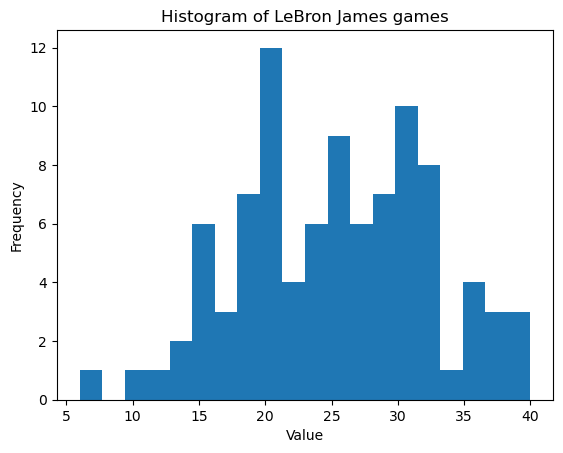

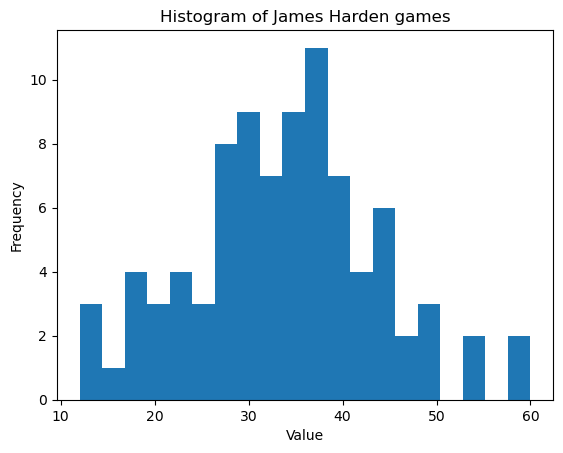

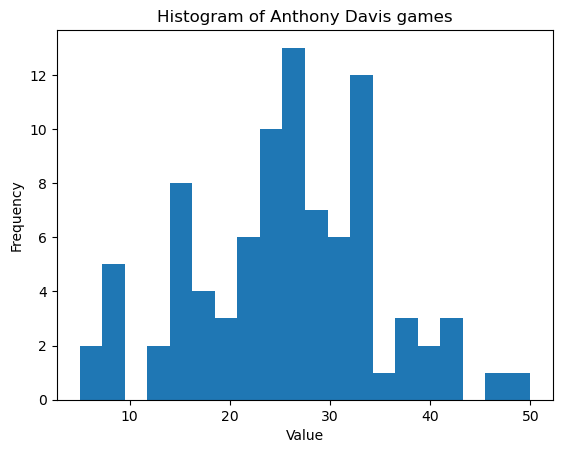

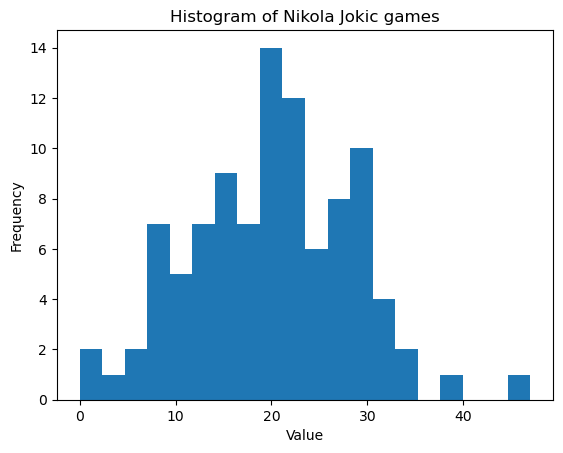

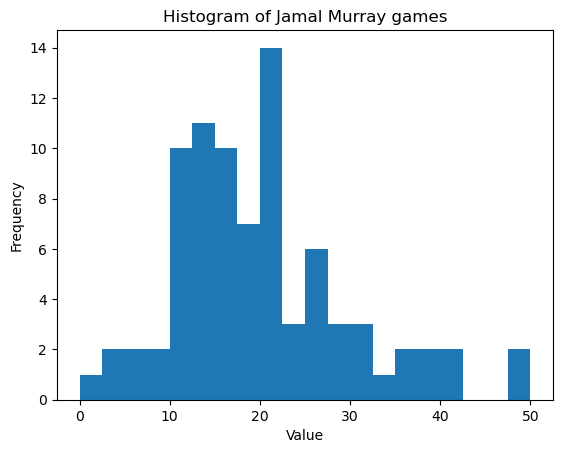

In [105]:
names = players_of_interest["PLAYER_NAME"]
for i in range(5):
    plt.hist(players_of_interest["PTS"][i], bins=20)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f"Histogram of {names[i]} games")
    plt.show()

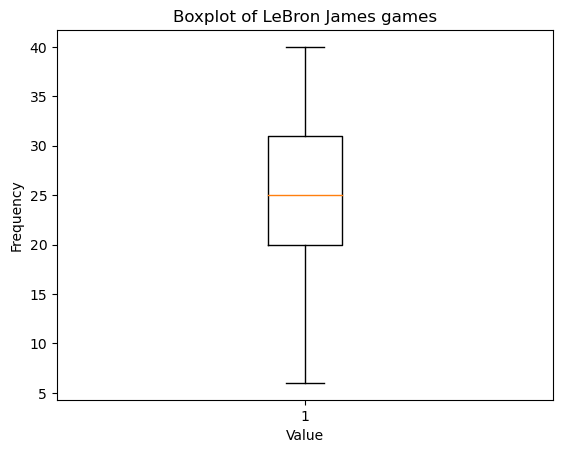

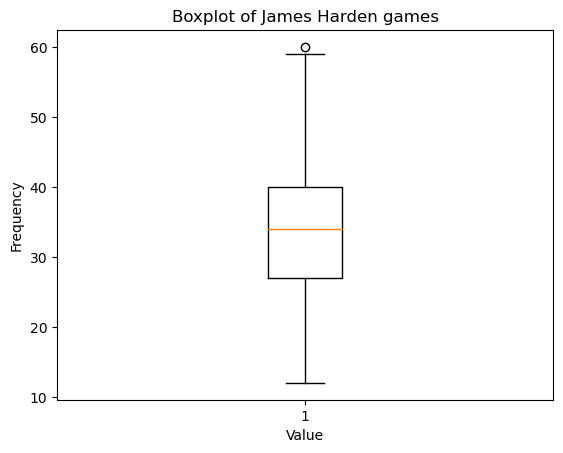

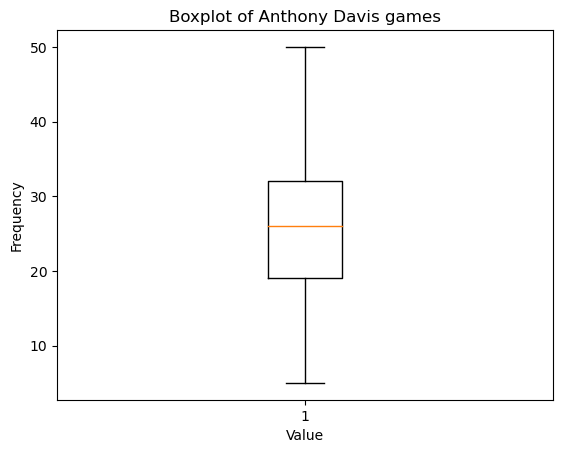

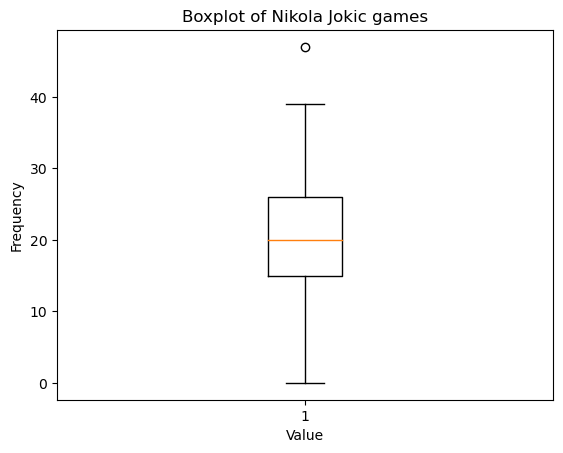

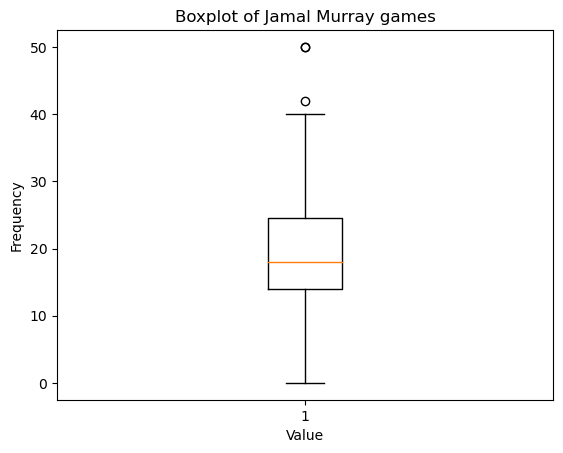

In [104]:
for i in range(5):
    plt.boxplot(players_of_interest["PTS"][i])
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f"Boxplot of {names[i]} games")
    plt.show()